# Business case

Um cliente observou aumento em seu número de seguidores por alguns meses seguidos. Pensando em monetizar sua rede social esse cliente decidiu contratar uma cientista de dados para analisar as metricas dos ultimos 6 meses da sua página buscando descobrir se há potencial de crescimento.

# Descrição do dataset

O dataset é o conjunto de métricas de uma conta na rede social Pinterest. 
O dataset contém 5 planilhas com métricas coletadas entre 01/01/2022 e 26/07/2022.
Nesse notebook foram analisados os dados contidos na tabela **client analitycs overview**.
Os dados sobre os quais as informações não estão disponível em: https://help.pinterest.com/en/business/article/pinterest-analytics e https://business.pinterest.com/en-us/creative-best-practices/, foram excluidos na analise. 
O dataset não está disponível publicamente. 

## Significado das métricas

Metric  | Definition
------- |------------
Impressions | The number of times your Pins or ads were on screen.
Engagements | The total number of engagements on your Pins. This includes saves, Pin clicks, outbound clicks, carousel card swipes, secondary creative (collections) clicks and Idea Pin forward/backward swipes.
Pin clicks | The total number of clicks on your Pin or ad so it opens in closeup.
Outbound clicks | The number of times people perform actions that lead them to a destination off Pinterest.
Outbound click rate | The total number of clicks to the destination URL associated with your Pin divided by the total number of times your Pins were on screen.
Video views | The amount of views for at least 2 seconds with 50% of video in view.
Average video play time | The average time someone spent playing the video and static image cards included in your pin.
Saves | The number of times people saved your video Pin to a board.
Pin click rate | The total number of clicks from your Pin or ad to content on or off Pinterest, divided by the total number of times your Pins or ads were on screen.
Engagement rate | The total engagements with your Pins divided by the total number of times your Pins were seen. Engagements include saves, Pin clicks, and outbound clicks.
Save rate | The total saves of your Pins divided by the total number of times your Pins were on screen.
Total audience | The total number of people who have seen or engaged with your Pins.
Monthly total audience | The total number of people who have seen or engaged with your Pins in a 30 day window up to and including each day.
Monthly total engaged audience | The total number of people who have engaged with your Pins in a 30 day window up to and including each day.
Monthly views | The number of times your published Pins and Pins saved from your claimed domain or accounts were on screen in the last 30 days.
Age | Which age groups are interacting with your Pins.
Gender | Which genders are interacting with your Pins.
Device | What device people are viewing your Pins on (web, android, iOS)
Standard Pins | High-quality, vertical images that will stand out in people’s feeds. With a 2:3 aspect ratio (ex: 1000 x 1500 pixels). May have a brand or a link.
Video Pins | videos between 15 seconds and 1 minute long
Idea Pins | Idea Pins are a multi-page canvas
Product Pins | Product Pins include real-time pricing, availability and info on where to buy the product. Product Pins are different from Buyable Pins because although they make information about your product readily available on Pinterest, they do not let a user buy the product directly from Pinterest. These Pins must link to the product landing page where you can actually purchase the product.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.patches import ConnectionPatch
import numpy as np

In [2]:
df = pd.read_excel('/Users/iaquine/Documents/GitHub/Projetos-Escola-de-Cientista/Projeto 2/Data/social media analise.xlsx', sheet_name=1)
df.head(10)

,Date,Engagement rate,Impressions,Pin clicks,Outbound clicks,Saves,Engagement rate.1,Pin click rate,Outbound click rate,Save rate,...,18-24 Monthly Total audience,25-34 Monthly Total audience,35-44 Monthly Total audience,45-49 Monthly Total audience,50-54 Monthly Total audience,55-64 Monthly Total audience,65+ Monthly Total audience,Female Monthly Total audience,Male Monthly Total audience,Unspecified and custom Monthly Total audience
0,2022-01-01,0.043145,1043,36,2,7,0.043145,0.034516,0.001918,0.006711,...,4731,8860,3593,880,815,1817,693,19444,2583,1418
1,2022-01-02,0.043367,1568,58,2,8,0.043367,0.036990,0.001276,0.005102,...,4765,9020,3619,889,826,1847,712,19753,2665,1416
2,2022-01-03,0.039704,1486,53,1,5,0.039704,0.035666,0.000673,0.003365,...,4806,9095,3634,910,837,1871,711,20022,2688,1433
3,2022-01-04,0.044715,1476,59,1,6,0.044715,0.039973,0.000678,0.004065,...,4875,9233,3612,921,828,1899,728,20098,2722,1431
4,2022-01-05,0.043754,1577,63,3,3,0.043754,0.039949,0.001902,0.001902,...,4902,9330,3656,921,839,1907,733,20285,2764,1450
5,2022-01-06,0.041345,1427,49,3,9,0.041345,0.034338,0.002102,0.006307,...,4973,9428,3701,934,848,1926,753,20374,2820,1471
6,2022-01-07,0.037915,1477,53,1,2,0.037915,0.035884,0.000677,0.001354,...,5045,9484,3719,939,859,1962,774,20573,2809,1460
7,2022-01-08,0.030731,2408,66,2,6,0.030731,0.027409,0.000831,0.002492,...,5145,9692,3834,972,892,2015,800,20986,2940,1491
8,2022-01-09,0.047290,1734,72,2,8,0.047290,0.041522,0.001153,0.004614,...,5222,9885,3906,980,914,2095,825,21443,2988,1526
9,2022-01-10,0.038630,1372,47,1,5,0.038630,0.034257,0.000729,0.003644,...,5247,9933,3950,987,930,2113,841,21794,2972,1535


In [3]:
df.shape

(177, 184)

In [4]:
print(df.columns.tolist())

['Date', 'Engagement rate', 'Impressions', 'Pin clicks', 'Outbound clicks', 'Saves', 'Engagement rate.1', 'Pin click rate', 'Outbound click rate', 'Save rate', 'Total audience', 'Engaged audience', 'Monthly Total audience', 'Monthly Engaged audience', 'Mobile Impressions', 'Tablet Impressions', 'Web Impressions', 'Product Impressions', 'Standard Impressions', 'Idea Impressions', 'Video Impressions', '18-24 Impressions', '25-34 Impressions', '35-44 Impressions', '45-49 Impressions', '50-54 Impressions', '55-64 Impressions', '65+ Impressions', 'Female Impressions', 'Male Impressions', 'Unspecified and custom Impressions', 'Mobile Engagement', 'Tablet Engagement', 'Web Engagement', 'Product Engagement', 'Standard Engagement', 'Idea Engagement', 'Video Engagement', '18-24 Engagement', '25-34 Engagement', '35-44 Engagement', '45-49 Engagement', '50-54 Engagement', '55-64 Engagement', '65+ Engagement', 'Female Engagement', 'Male Engagement', 'Unspecified and custom Engagement', 'Mobile Pin c

In [5]:
df['Date'].isna().sum()

0

In [6]:
df['Total audience'].isna().sum()

0

# Analisando crescimento de audiencia ao longo do tempo


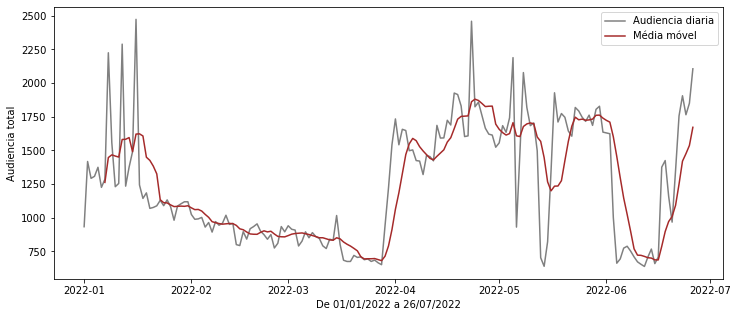

In [7]:
#Calculo da média movel 
df_audience_mean = df['Total audience'].rolling( 7).mean()

plt.figure(figsize = ( 12, 5)) 
sns.lineplot( x = df['Date'], 
             y = df['Total audience'], 
             data = df, 
             label = 'Audiencia diaria',
             color='gray')
sns.lineplot( x = df['Date'], 
             y = df_audience_mean, 
             data = df, 
             label = 'Média móvel',
             color='brown') 
plt.xlabel('De 01/01/2022 a 26/07/2022') 
plt.ylabel('Audiencia total') ;

#### Pode-se observar que apesar de ter havido uma queda na audiencia entre os meses de junho e julho ainda assim há crescimento.

# Analisando a interação do público com o conteúdo 

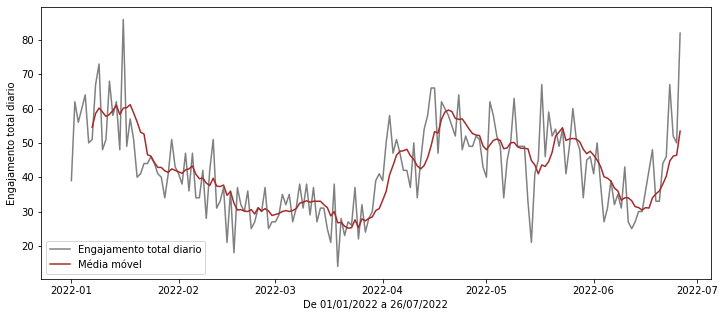

In [8]:
df_audience_mean = df['Engaged audience'].rolling( 7).mean()
plt.figure(figsize = ( 12, 5)) 
sns.lineplot( x = df['Date'], 
             y = df['Engaged audience'], 
             data = df, 
             label = 'Engajamento total diario',
             color='gray')
sns.lineplot( x = df['Date'], 
             y = df_audience_mean, 
             data = df, 
             label = 'Média móvel',
             color='brown') 
plt.xlabel('De 01/01/2022 a 26/07/2022') 
plt.ylabel('Engajamento total diario') ;

#### Podemos observar crescimento tanto na audiencia total quanto na interação com o conteúdo produzido.

# Segmentação do público:
- Por genero 
- Por idade

In [9]:
publi_fem=df['Female Total audience'].sum()
publi_masc=df['Male Total audience'].sum()
publi_inesp=df['Unspecified and custom Total audience'].sum()

In [10]:
legenda_genero=['Público \nfeminino','Público \nmasculino','Público \nnão especificado']
dados_pie=[publi_fem,publi_masc,publi_inesp]

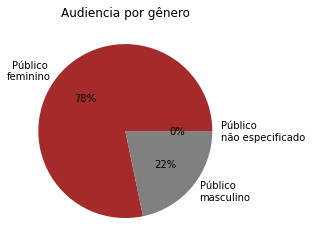

In [11]:
plt.pie(dados_pie, labels=legenda_genero,colors=['brown','gray'], autopct = '%0.0f%%')
plt.title("Audiencia por gênero")
plt.show()

#### Pode-se observar que a grande maioria do público é do gênero feminino.

In [12]:
eng_fem=df['Female Engagement'].sum()
eng_masc=df['Male Engagement'].sum()
eng_inesp=df['Unspecified and custom Engagement'].sum()

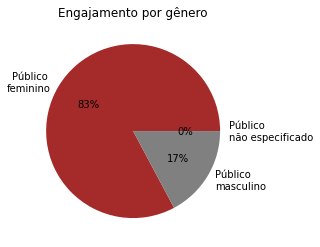

In [13]:
legenda_eng=['Público \nfeminino','Público \nmasculino','Público \nnão especificado']
dados_eng_pie=[eng_fem,eng_masc,eng_inesp]
plt.pie(dados_eng_pie, labels=legenda_eng,colors=['brown','gray'], autopct = '%0.0f%%')
plt.title("Engajamento por gênero")
plt.show()

#### A interação com o conteúdo também é feita em sua grande maioria por pessoas do gênero feminino.

In [14]:
total_18_24 = df['18-24 Total audience'].sum()
total_25_34 = df['25-34 Total audience'].sum()
total_35_44 = df['50-54 Total audience'].sum()
total_45_49 = df['50-54 Total audience'].sum()
total_50_54 = df['50-54 Total audience'].sum()
total_55_64 = df['55-64 Total audience'].sum()
total_64_ = df['65+ Total audience'].sum()
legenda_idade=['18-24 \nanos',
         '25-34 \nanos',
         '35-44 \nanos',
         '45-49 \nanos',
         '50-54 \nanos',
         '55-64 \nanos', 
         '64+ \nanos']

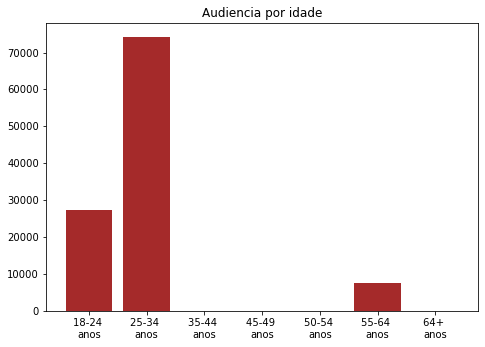

In [15]:
dados_idade_total=[total_18_24,
            total_25_34,
            total_35_44,
            total_45_49,
            total_50_54,
            total_55_64,
            total_64_]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Audiencia por idade')
ax.bar(legenda_idade,dados_idade_total,color='brown')
plt.show()

In [16]:
eng_18_24 = df['18-24 Engagement'].sum()
eng_25_34 = df['25-34 Engagement'].sum()
eng_35_44 = df['50-54 Engagement'].sum()
eng_45_49 = df['50-54 Engagement'].sum()
eng_50_54 = df['50-54 Engagement'].sum()
eng_55_64 = df['55-64 Engagement'].sum()
eng_64_ = df['65+ Engagement'].sum()
legenda_eng_idade=['18-24 \nanos',
         '25-34 \nanos',
         '35-44 \nanos',
         '45-49 \nanos',
         '50-54 \nanos',
         '55-64 \nanos', 
         '64+ \nanos']

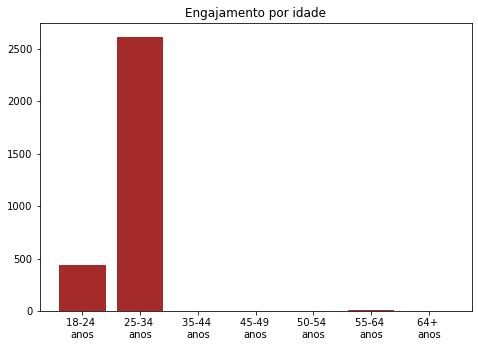

In [17]:
dados_idade=[eng_18_24,
            eng_25_34,
            eng_35_44,
            eng_45_49,
            eng_50_54,
            eng_55_64,
            eng_64_]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Engajamento por idade')
ax.bar(legenda_eng_idade,dados_idade,color='brown')
plt.show()

#### Quanto a idade, observou-se que a parcela mais significativa da audiencia tem entre 25-34 anos.

# Análise por mídia de acesso

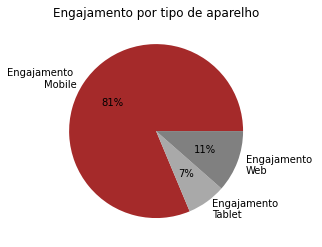

In [18]:
eng_mobile=df['Mobile Engagement'].sum()
eng_tablet=df['Tablet Engagement'].sum()
eng_web=df['Web Engagement'].sum()

legenda_eng_device=['Engajamento \nMobile','Engajamento \nTablet','Engajamento \nWeb']
dados_eng_device=[eng_mobile,eng_tablet,eng_web]
plt.pie(dados_eng_device, labels=legenda_eng_device,colors=['brown','darkgray','gray'], autopct = '%0.0f%%')
plt.title("Engajamento por tipo de aparelho")
plt.show()

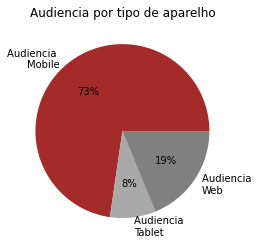

In [19]:
audiencia_mobile=df['Mobile Total audience'].sum()
audiencia_tablet=df['Tablet Total audience'].sum()
audiencia_web=df['Web Total audience'].sum()

legenda_aud_device=['Audiencia \nMobile','Audiencia \nTablet','Audiencia \nWeb']
dados_aud_device=[audiencia_mobile,audiencia_tablet,audiencia_web]
plt.pie(dados_aud_device, labels=legenda_aud_device,colors=['brown','darkgray','gray'], autopct = '%0.0f%%')
plt.title("Audiencia por tipo de aparelho")
plt.show()

#### Como era esperado, a maioria dos acessos são feitos através de aparelhos celular. 

# Análise de cliques na página

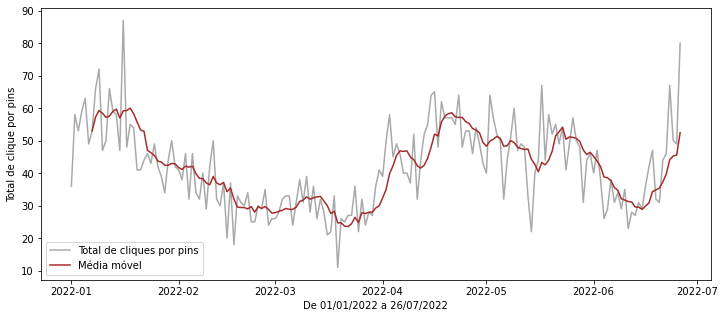

In [20]:
df_pin_clicks_mean = df['Pin clicks'].rolling( 7).mean()
plt.figure(figsize = ( 12, 5)) 
sns.lineplot( x = df['Date'], 
             y = df['Pin clicks'], 
             data = df, 
             label = 'Total de cliques por pins',
             color='darkgray')
sns.lineplot( x = df['Date'], 
             y = df_pin_clicks_mean, 
             data = df, 
             label = 'Média móvel',
             color='brown') 
plt.xlabel('De 01/01/2022 a 26/07/2022') 
plt.ylabel('Total de clique por pins') ;

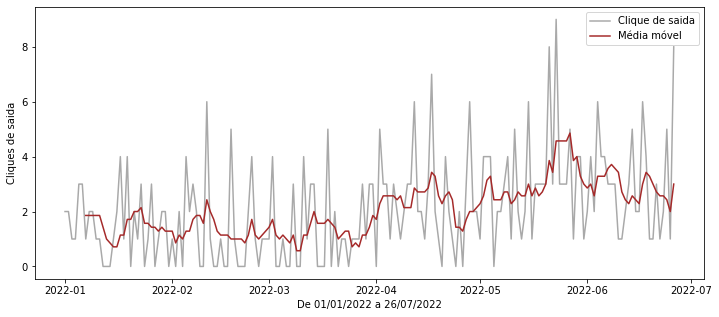

In [21]:
df_out_clicks_mean = df['Outbound clicks'].rolling( 7).mean()
plt.figure(figsize = ( 12, 5)) 
sns.lineplot( x = df['Date'], 
             y = df['Outbound clicks'], 
             data = df, 
             label = 'Clique de saida',
             color='darkgray')
sns.lineplot( x = df['Date'], 
             y = df_out_clicks_mean, 
             data = df, 
             label = 'Média móvel',
             color='brown') 
plt.xlabel('De 01/01/2022 a 26/07/2022') 
plt.ylabel('Cliques de saida') ;

#### Como a audiência a quantidade de cliques nos pins (posts) também mostra uma tendência de crescimento. 

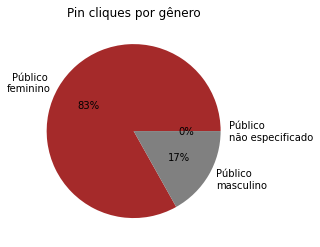

In [22]:
fem_clicks=df['Female Pin clicks'].sum()
masc_clicks=df['Male Pin clicks'].sum()
unesp_clicks=df['Unspecified and custom Pin clicks'].sum()

legenda_out_clicks=['Público \nfeminino','Público \nmasculino','Público \nnão especificado']
dados_clicks_genero=[fem_clicks,masc_clicks,unesp_clicks]

plt.pie(dados_clicks_genero, labels=legenda_out_clicks,colors=['brown','gray'], autopct = '%0.0f%%')
plt.title("Pin cliques por gênero")
plt.show()

In [23]:
pin_clicks_18_24 = df['18-24 Pin clicks'].sum()
pin_clicks_25_34 = df['25-34 Pin clicks'].sum()
pin_clicks_35_44 = df['50-54 Pin clicks'].sum()
pin_clicks_45_49 = df['50-54 Pin clicks'].sum()
pin_clicks_50_54 = df['50-54 Pin clicks'].sum()
pin_clicks_55_64 = df['55-64 Pin clicks'].sum()
pin_clicks_64_ = df['65+ Pin clicks'].sum()
legenda_pin_clicks=['18-24 \nanos',
         '25-34 \nanos',
         '35-44 \nanos',
         '45-49 \nanos',
         '50-54 \nanos',
         '55-64 \nanos', 
         '64+ \nanos']

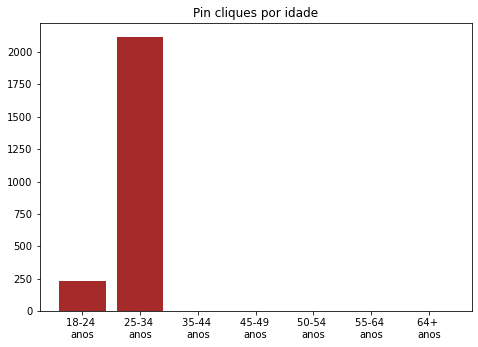

In [24]:
dados_pin_clicks=[pin_clicks_18_24,
            pin_clicks_25_34,
            pin_clicks_35_44,
            pin_clicks_45_49,
            pin_clicks_50_54,
            pin_clicks_55_64,
            pin_clicks_64_]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Pin cliques por idade')
ax.bar(legenda_pin_clicks,dados_pin_clicks,color='brown')
plt.show()

### Para confirmar a idade e o gênero da audiência também foi feita essa segmentação em relação aos cliques no página.

# Análise de tipo de conteúdo

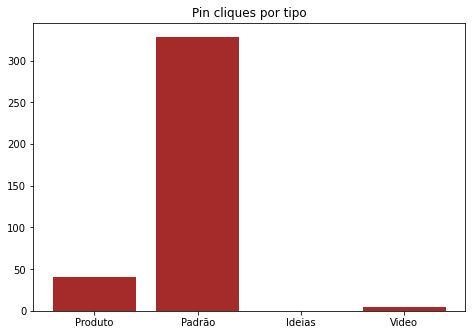

In [25]:
prod_out_clicks=df['Product Outbound clicks'].sum()
stand_out_clicks=df['Standard Outbound clicks'].sum()
idea_out_clicks=df['Idea Outbound clicks'].sum()
video_out_clicks=df['Video Outbound clicks'].sum()

legenda_out_clicks_tipo=['Produto','Padrão','Ideias', 'Video']
dados_out_clicks_tipo=[prod_out_clicks,stand_out_clicks,idea_out_clicks,video_out_clicks]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Pin cliques por tipo')
ax.bar(legenda_out_clicks_tipo,dados_out_clicks_tipo,color='brown')
plt.show()

### O tipo de contéudo mais consumido pela audiência dessa página é em formato padrão que consiste em uma imagem de alta qualidade podendo conter ou não um link de saida. 

In [26]:
df_conteudo = pd.read_excel('/Users/iaquine/Documents/GitHub/Projetos-Escola-de-Cientista/Projeto 2/Data/social media analise.xlsx', sheet_name=2)
df_conteudo.head(10)

,Topic,Impressions,Engagement,Pin clicks,Outbound clicks,Saves
0,diy ideas,101720,2496,2099,134,283
1,hair,43689,2110,1836,29,247
2,fashion,21987,821,703,35,85
3,decoration,12803,468,397,37,36
4,succulents suculentas and flowers,10416,445,366,18,65
5,baby animals,8085,376,348,6,23
6,otaku things,7552,432,399,3,31
7,food,6254,294,255,17,22
8,cups lover,5469,161,128,6,28
9,nails colors,4835,149,124,4,22


In [27]:
total_other_topics = df_conteudo['Impressions'].sum()-df_conteudo['Impressions'][0]-df_conteudo['Impressions'][1]-df_conteudo['Impressions'][2]

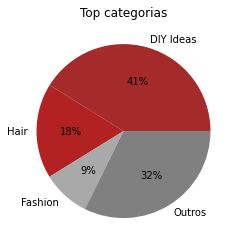

In [28]:
legenda_topics=['DIY Ideas','Hair','Fashion','Outros']
dados_top_topics=[df_conteudo['Impressions'][0],
                  df_conteudo['Impressions'][1],
                  df_conteudo['Impressions'][2],
                  total_other_topics]

plt.pie(dados_top_topics, labels=legenda_topics,colors=['brown','firebrick','darkgray','gray'], autopct = '%0.0f%%')
plt.title("Top categorias")
plt.show()

### A categoria mais acessada é a DIY ou 'Faça você mesmo', em português. Como essa categoria é muito ampla vamos explorar quais temas dentro dessa categorias tem mais engajamento no Pinterest como todo.

In [29]:
df_topicos = pd.read_excel('/Users/iaquine/Documents/GitHub/Projetos-Escola-de-Cientista/Projeto 2/Data/social media analise.xlsx', sheet_name=5)
df_topicos.head(10)

,Category,Bulk Sheet Category,Percent of audience,Affinity,Interest,Bulk Sheet Interests,Percent of audience.1,Affinity.1
0,Art,"{'name': 'Art', 'id': '961238559656'}",0.86,1.0,Photography,"{'name ': 'Ph otography', 'id': '90 5860166503'}",0.66,1.0
1,Art,"{'name': 'Art', 'id': '961238559656'}",0.86,1.0,Photography Subject s,"{'n ame': 'Photography Su bjects', 'id': '9175...",0.54,1.0
2,Art,"{'name': 'Art', 'id': '961238559656'}",0.86,1.0,Illustration,"{'nam e': 'I llustration', 'id': ' 907002707958'}",0.40,1.0
3,Art,"{'name': 'Art', 'id': '961238559656'}",0.86,1.0,Drawing,"{'name': ' Drawin g', 'id': '9186442013 89'}",0.40,1.0
4,Art,"{'name': 'Art', 'id': '961238559656'}",0.86,1.0,Body Art,"{'name': 'Body Art', 'id': '90933750 6117'}",0.35,1.0
5,Art,"{'name': 'Art', 'id': '961238559656'}",0.86,1.0,Painting,"{'name': 'Paint ing', 'id': '93807104 4570'}",0.31,1.0
6,Art,"{'name': 'Art', 'id': '961238559656'}",0.86,1.0,People Photography,{'nam e': 'People Photograp hy''id': '91896636...,0.30,1.0
7,Art,"{'name': 'Art', 'id': '961238559656'}",0.86,1.0,Tattoo,"{'name': 'T attoo' , 'id': '922203297757 '}",0.29,1.0
8,Art,"{'name': 'Art', 'id': '961238559656'}",0.86,1.0,Art Tutorial,"{'nam e': 'A rt Tutorial', 'id': ' 908625431820'}",0.28,1.0
9,Art,"{'name': 'Art', 'id': '961238559656'}",0.86,1.0,Poster Design,"{'na me': ' Poster Design', 'id': '947703397050'}",0.27,1.0


In [30]:
df_topicos['Category'].unique()

array(['Art', 'Home Decor', 'Entertainment', 'DIY and Crafts',
       "Women's Fashion", 'Design', 'Beauty', 'Education', 'Health',
       'Quotes', 'Food and Drinks', 'Event Planning', 'Wedding',
       'Gardening', 'Sport', 'Travel', 'Architecture', 'Parenting',
       'Animals', "Men's Fashion", 'Electronics', 'Vehicles',
       "Children's Fashion", 'Finance'], dtype=object)

In [31]:
df_top_interests = df_topicos.loc[df_topicos['Category']=='DIY and Crafts']
df_top_interests

,Category,Bulk Sheet Category,Percent of audience,Affinity,Interest,Bulk Sheet Interests,Percent of audience.1,Affinity.1
150,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,DIY Projects,"{'name': ' DIY Projects', 'id': '894309586150'}",0.48,1.0
151,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,Fab ric Crafts,"{'name': 'Fabric Crafts', 'id': '909430966917'}",0.45,1.0
152,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,DIY Home and Decorations,"{'name': 'DIY Home and Decorations', 'id': '94...",0.37,1.0
153,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,Clo thes,"{'name': 'Cloth es', 'id': '929296563874'}",0.28,1.0
154,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,Kid s' Crafts,"{'name': Kids' Crafts""'id': '927681941354'}",0.27,1.0
155,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,DIY Event,"{'name': 'DIY Event', 'id': '922120925682'}",0.24,1.0
156,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,DIY Stationery,"{'name': 'DIY Stationery', 'id': '902014579881'}",0.21,1.0
157,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,Woo dworking,"{'name': 'W oodworking', 'id': '899049071324'}",0.14,1.0
158,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,Sew ing,"{'name': 'Sewing ', 'id': '955673950121'}",0.13,1.0
159,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,DIY Party Decorations,"{ 'name': 'DIY Party Decorations', 'id': '9220...",0.11,1.0


In [32]:
df_top_interests = df_top_interests.loc[150:160]
df_top_interests

,Category,Bulk Sheet Category,Percent of audience,Affinity,Interest,Bulk Sheet Interests,Percent of audience.1,Affinity.1
150,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,DIY Projects,"{'name': ' DIY Projects', 'id': '894309586150'}",0.48,1.0
151,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,Fab ric Crafts,"{'name': 'Fabric Crafts', 'id': '909430966917'}",0.45,1.0
152,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,DIY Home and Decorations,"{'name': 'DIY Home and Decorations', 'id': '94...",0.37,1.0
153,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,Clo thes,"{'name': 'Cloth es', 'id': '929296563874'}",0.28,1.0
154,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,Kid s' Crafts,"{'name': Kids' Crafts""'id': '927681941354'}",0.27,1.0
155,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,DIY Event,"{'name': 'DIY Event', 'id': '922120925682'}",0.24,1.0
156,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,DIY Stationery,"{'name': 'DIY Stationery', 'id': '902014579881'}",0.21,1.0
157,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,Woo dworking,"{'name': 'W oodworking', 'id': '899049071324'}",0.14,1.0
158,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,Sew ing,"{'name': 'Sewing ', 'id': '955673950121'}",0.13,1.0
159,DIY and Crafts,"{'name': 'DIY and Crafts', 'id': '934876475639'}",0.72,1 .0,DIY Party Decorations,"{ 'name': 'DIY Party Decorations', 'id': '9220...",0.11,1.0


In [33]:
df_top_interests=df_top_interests.drop(columns=['Category','Bulk Sheet Category','Percent of audience','Affinity', 'Bulk Sheet Interests','Affinity.1'])
df_top_interests

,Interest,Percent of audience.1
150,DIY Projects,0.48
151,Fab ric Crafts,0.45
152,DIY Home and Decorations,0.37
153,Clo thes,0.28
154,Kid s' Crafts,0.27
155,DIY Event,0.24
156,DIY Stationery,0.21
157,Woo dworking,0.14
158,Sew ing,0.13
159,DIY Party Decorations,0.11


In [34]:
df_top_interests=df_top_interests.replace({'Interest':{'Fab ric Crafts': 'Fabric Crafts',  'Clo thes': 'Clothes', 'Woo dworking':'Wood working', 'Sew ing':'Sewing'}})
df_top_interests

,Interest,Percent of audience.1
150,DIY Projects,0.48
151,Fabric Crafts,0.45
152,DIY Home and Decorations,0.37
153,Clothes,0.28
154,Kid s' Crafts,0.27
155,DIY Event,0.24
156,DIY Stationery,0.21
157,Wood working,0.14
158,Sewing,0.13
159,DIY Party Decorations,0.11


In [35]:
legenda_interest=['DIY Projects','Fabric Crafts','DIY Home and Decorations','Clothes','Kids Crafts','DIY Event','DIY Stationery','Wood working','Sewing','DIY Party Decorations','DIY Edible']
dados_top_interest=[df_top_interests['Percent of audience.1'][150],
                  df_top_interests['Percent of audience.1'][151],
                  df_top_interests['Percent of audience.1'][152],
                  df_top_interests['Percent of audience.1'][153],
                  df_top_interests['Percent of audience.1'][154],
                  df_top_interests['Percent of audience.1'][155],
                  df_top_interests['Percent of audience.1'][156],
                  df_top_interests['Percent of audience.1'][157],
                  df_top_interests['Percent of audience.1'][158],
                  df_top_interests['Percent of audience.1'][159],
                  df_top_interests['Percent of audience.1'][160]]

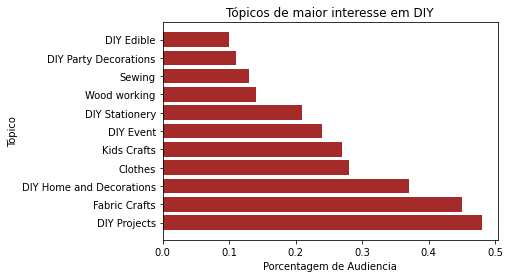

In [36]:
plt.barh(legenda_interest,dados_top_interest,color='brown')
plt.title('Tópicos de maior interesse em DIY')
plt.ylabel('Tópico')
plt.xlabel('Porcentagem de Audiencia')
plt.show()

### Dentro da categoria DIY os tópicos com mais acesso são: 
- DIY projects, que são tutoriais 'faça você mesmo'
- Fabric Crafts, em português artesanato em  tecido 
- DIY Home and Decorations, em português 'faça você mesmo' casa e decoração.

# Conclusão: 

Observou-se através das métricas analisadas que essa rede social possui tendencia de crescimento. Especialmente quando analisamos "Outbound clicks", que são cliques em posts que levam a sites de compra. 
Também foram feitas analises para determinar o público da rede social do cliente, público feminino entre 25 e 34 anos. E por último foi analisado a categoria e os tópicos de interesse mais acessados por esse público.
Todas essa informações podem ser usadas para direcionar a produção de conteúdo e marketing dentro dessa rede social.